## PyMC GeoMod Sandstone Simplified: Adding gravimetry inversion

#### Importing stuff

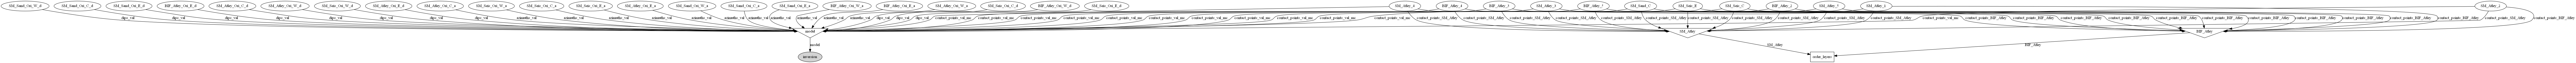

In [7]:
Image("Sandstone_grav_Inv_alpha.png")

In [1]:
%matplotlib inline
from IPython.core.display import Image
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import shutil
#import geobayes_simple as gs
from itertools import chain
import pymc as pm # PyMC 2
from pymc.Matplot import plot
from pymc import graph as gr
import pandas as pn
import numpy as np
#import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)
# as we have our model and pygeomod in different paths, let's change the pygeomod path to the default path.
sys.path.append("C:\Users\Miguel\workspace\pygeomod\pygeomod")
#sys.path.append(r'/home/jni/git/tmp/pygeomod_tmp')
import geogrid
import geomodeller_xml_obj as gxml
reload(gxml)
reload(geogrid)



Couldn't import dot_parser, loading of dot files will not be possible.


<module 'geogrid' from 'C:\Users\Miguel\workspace\pygeomod\pygeomod\geogrid.pyc'>

### Creating the Bayesian Model of the input data!
#### First: Importing the uncertainty data from geolgical observations


In [2]:
data = pn.read_excel("C:\Users\Miguel\workspace\geobayes\paper_sandstone\models\Uncertainties.xlsx")                    
data_ar = data.values[:,[0,3,6,7]]
#print np.asarray(data_ar[data_ar[:,1] == "depth"][:,[0,2,3]])

#### Second: Importing Geophysic data

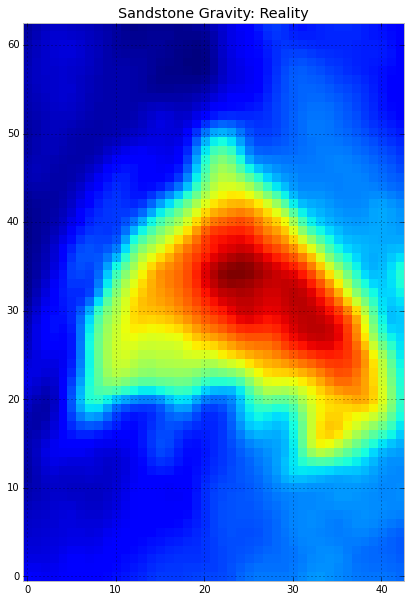

In [3]:
Sst_grav_1000 = np.loadtxt('Temp_Sandstone\Sandstone_geophys\Sst_grav_1000.xyz')
Sst_grav_2000 = np.loadtxt('Temp_Sandstone\Sandstone_geophys\Sst_grav_2000.xyz')
Sst_grav_500 = np.loadtxt('Temp_Sandstone\Sandstone_geophys\Sst_grav_500.xyz')
# Extracting information:
Grav_1000 = Sst_grav_1000[:,3].reshape((63,43))
# Normalizing
Grav_1000_norm = (Grav_1000-np.max(Grav_1000))/np.min(Grav_1000-np.max(Grav_1000))
plt.title("Sandstone Gravity: Reality")
plt.imshow(Grav_1000_norm, origin = "lower left",
       interpolation = 'nearest', cmap = 'jet_r')

plt.savefig("Sandstone_Figures/Real_grav_1000.png")

### Showing Results

In [2]:
#Loading data base
N = pm.database.hdf5.load("database_sands/Sandstone_inv9.hdf5")
K = pm.database.hdf5.load("database_sands_beta/Sandstone_Cmplx1.hdf5")
M = pm.database.hdf5.load("database_sands_beta/Sandstone_inv_11.hdf5")
f = pm.database.hdf5.load("database_sands_beta/Sandstone_inv_12.hdf5")
h = pm.database.hdf5.load("database_sands_beta/Sandstone_inv_densities.hdf5")
L = pm.database.hdf5.load("database_sands_beta/Sandstone_Cmplx1_2.hdf5")
L.chains

2

In [50]:
M.trace_names

[['BIF_Atley_2',
  'BIF_Atley_3',
  'BIF_Atley_4',
  'BIF_Atley_5',
  'Metropolis_BIF_Atley_2_adaptive_scale_factor',
  'Metropolis_BIF_Atley_3_adaptive_scale_factor',
  'Metropolis_BIF_Atley_4_adaptive_scale_factor',
  'Metropolis_BIF_Atley_5_adaptive_scale_factor',
  'Metropolis_SM_Atley_1_adaptive_scale_factor',
  'Metropolis_SM_Atley_2_adaptive_scale_factor',
  'Metropolis_SM_Atley_3_adaptive_scale_factor',
  'Metropolis_SM_Atley_4_adaptive_scale_factor',
  'Metropolis_SM_Atley_5_adaptive_scale_factor',
  'Metropolis_SM_Sand_C_adaptive_scale_factor',
  'Metropolis_SM_Seis_C_adaptive_scale_factor',
  'Metropolis_SM_Seis_E_adaptive_scale_factor',
  'SM_Atley_1',
  'SM_Atley_2',
  'SM_Atley_3',
  'SM_Atley_4',
  'SM_Atley_5',
  'SM_Sand_C',
  'SM_Seis_C',
  'SM_Seis_E',
  'deviance',
  'e_sq',
  'model']]

In [3]:
L.trace("model", chain = 1)[:]

array([<geogrid.GeoGrid instance at 0x000000001BE8FEC8>,
       <geogrid.GeoGrid instance at 0x000000001BE8FF08>,
       <geogrid.GeoGrid instance at 0x000000001BE8FF48>,
       <geogrid.GeoGrid instance at 0x000000001BE8FF88>,
       <geogrid.GeoGrid instance at 0x000000001BE8FFC8>,
       <geogrid.GeoGrid instance at 0x000000001BE97048>,
       <geogrid.GeoGrid instance at 0x000000001BE97088>,
       <geogrid.GeoGrid instance at 0x000000001BE970C8>,
       <geogrid.GeoGrid instance at 0x000000001BE97108>], dtype=object)

In [5]:
h.trace("e_sq", chain = 1)[:]

array([ 136558.48184349,    5401.03333512,  103402.72283555,
          1152.8629943 ,  180529.25396486])

In [14]:
f.getstate()

{'sampler': {'_burn': 0,
  '_burn_till_tuned': False,
  '_current_iter': 5,
  '_iter': 5,
  '_thin': 1,
  '_tune_interval': 1000,
  '_tune_throughout': True,
  '_tuned_count': 0,
  'status': 'ready'},
 'step_methods': {'Metropolis_BIF_Atley_2': {'accepted': 0.0,
   'adaptive_scale_factor': 1.0,
   'check_before_accepting': True,
   'proposal_distribution': 'Normal',
   'proposal_sd': 1747.144141205099,
   'rejected': 10.0},
  'Metropolis_BIF_Atley_3': {'accepted': 2.0,
   'adaptive_scale_factor': 1.0,
   'check_before_accepting': True,
   'proposal_distribution': 'Normal',
   'proposal_sd': 3879.3821857412809,
   'rejected': 8.0},
  'Metropolis_BIF_Atley_4': {'accepted': 2.0,
   'adaptive_scale_factor': 1.0,
   'check_before_accepting': True,
   'proposal_distribution': 'Normal',
   'proposal_sd': 339.77610127865569,
   'rejected': 8.0},
  'Metropolis_BIF_Atley_5': {'accepted': 0.0,
   'adaptive_scale_factor': 1.0,
   'check_before_accepting': True,
   'proposal_distribution': 'Normal'

In [21]:
n_samples = 9

GeoMod_samples, GeoMod_samples_all = L.trace('model', chain = 1)[-n_samples:], M.trace('model')[:]
GeoMod_samples = np.append(GeoMod_samples,(L.trace('model', chain = 0)[3]))
GeoMod_samples = GeoMod_samples[-9:]
#GeoMod_samples, GeoMod_samples_all = np.append(GeoMod_samples,N.trace('model')[-2:]), np.append(GeoMod_samples_all,
 #                                                                                               N.trace('model')[:])
print L.trace('model', chain = 0)[4]
print GeoMod_samples
len(GeoMod_samples)

<geogrid.GeoGrid instance at 0x0000000021470108>
[<geogrid.GeoGrid instance at 0x000000001F81CC48>
 <geogrid.GeoGrid instance at 0x000000001F81CB48>
 <geogrid.GeoGrid instance at 0x000000001FB67148>
 <geogrid.GeoGrid instance at 0x000000001C44B608>
 <geogrid.GeoGrid instance at 0x000000001C44BA48>
 <geogrid.GeoGrid instance at 0x00000000200D80C8>
 <geogrid.GeoGrid instance at 0x000000001F596FC8>
 <geogrid.GeoGrid instance at 0x000000001F596B48>
 <geogrid.GeoGrid instance at 0x00000000214700C8>]


9

### Plotting: Representation of the Models

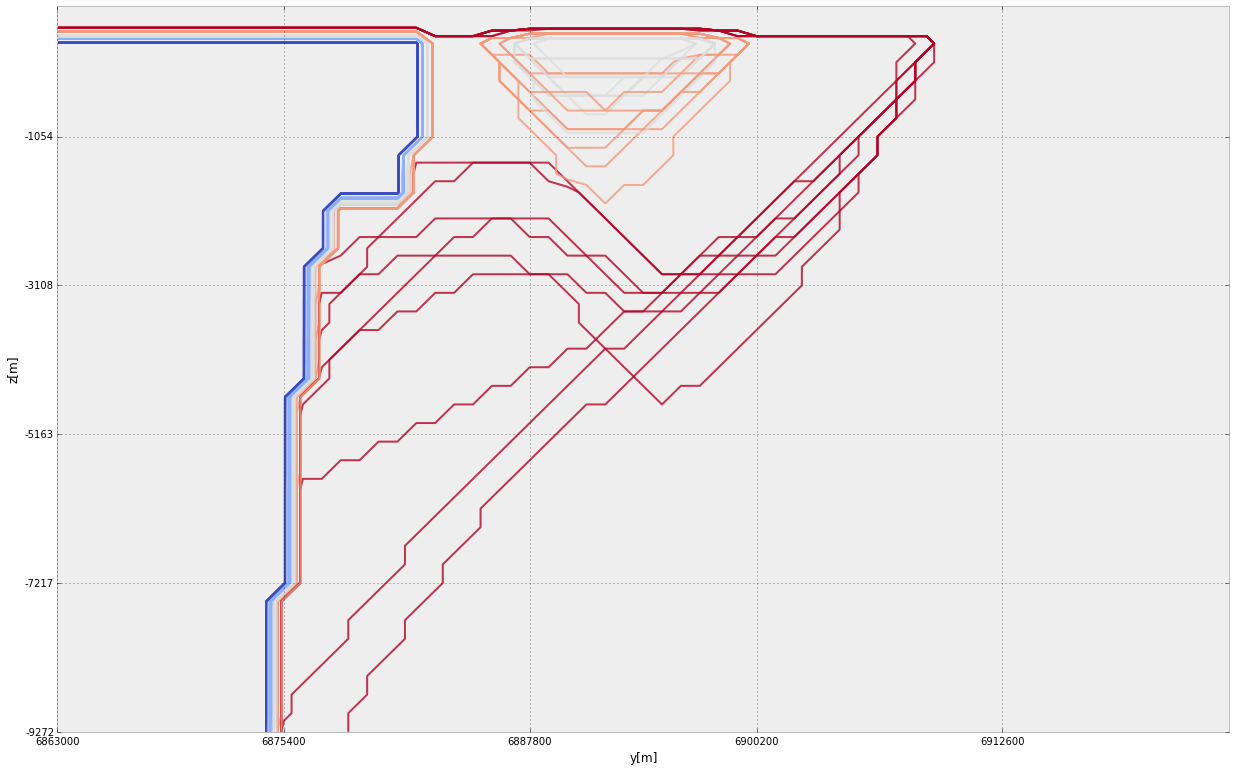

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(21,13))

for i in GeoMod_samples:
    i.plot_section('x',cell_pos=19,colorbar = True, ax = ax, alpha = 0.8, cmap = 'coolwarm_r',
                interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = True, 
                   savefig = True, fig_filename = "Uncertainty Sandstone")  

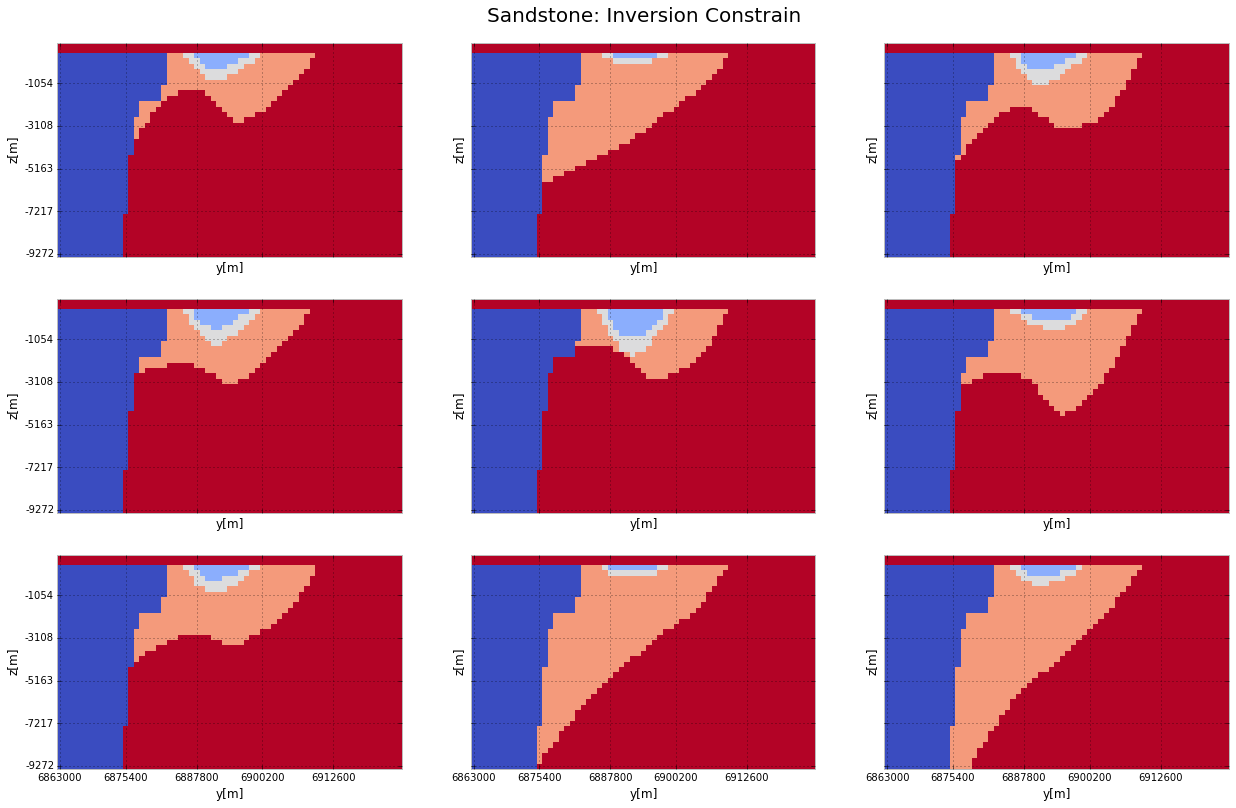

In [25]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize = (21, 13))


plt.text(0.5, 1.1, "Sandstone: Inversion Constrain",
     horizontalalignment='center',
        fontsize=20,
        transform = axs[0,1].transAxes)
#plt.subplots_adjust(top=2.15)
#axs[0,1].set_title("Posterior Faults: Non-Constrains", fontsize=20)

for i, g  in enumerate(GeoMod_samples):
    g.plot_section('x',cell_pos=19,colorbar = True, cmap = "coolwarm_r", fig_filename = "9plots",
                   ax = axs[i- 3*(i/3),i/3], alpha = 1, figsize= (50,6),interpolation= 'nearest' ,
                   ve = 4, geomod_coord= True, contour = False)    
    
plt.savefig("Sandstone_Figures/9plot_cmplx3_conf.png", transparent = True)    

### Plotting: Gravity

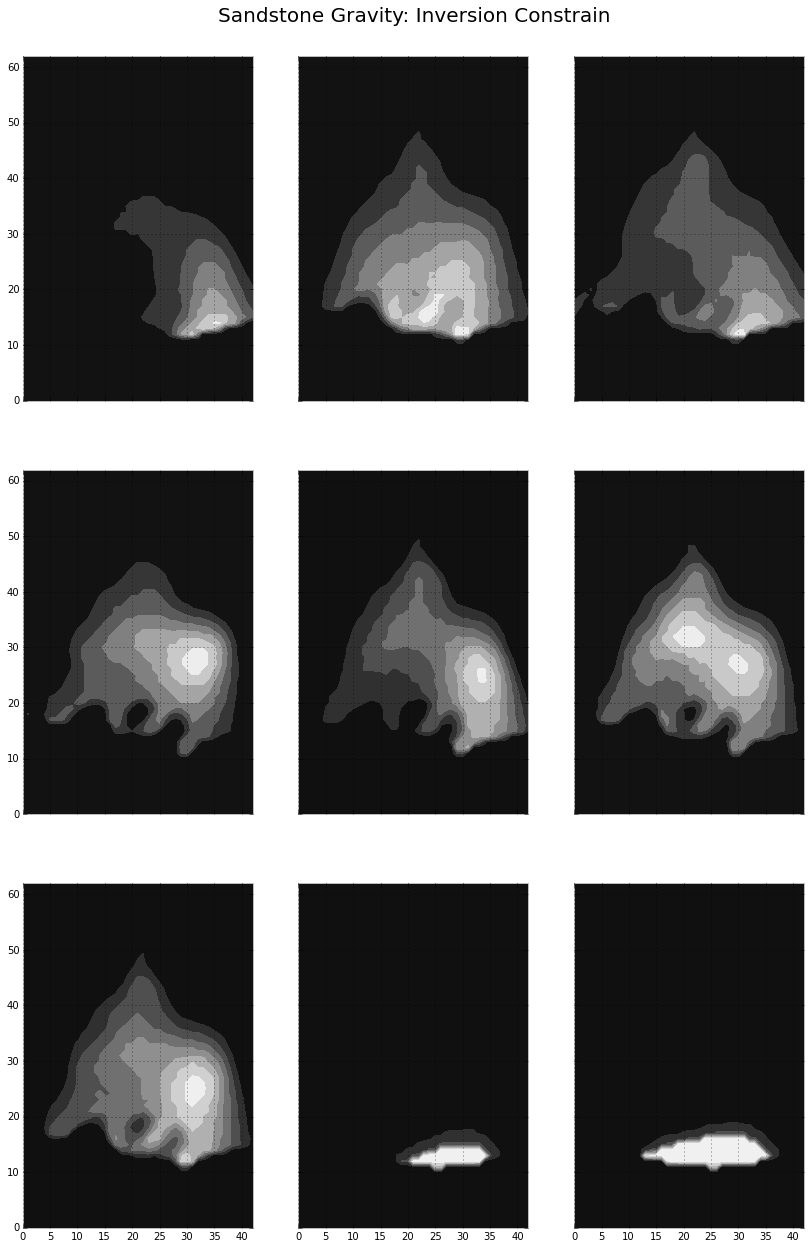

In [24]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize = (14, 21))


plt.text(0.5, 1.1, "Sandstone Gravity: Inversion Constrain",
     horizontalalignment='center',
        fontsize=20,
        transform = axs[0,1].transAxes)
#plt.subplots_adjust(top=2.15)
#axs[0,1].set_title("Posterior Faults: Non-Constrains", fontsize=20)

for i, g  in enumerate(GeoMod_samples):
#    densities = {0: 0.1,
 #              1: 2610,
  #             2: 2920,
   #            3: 3100,
    #           4: 2920,
     #          5: 2610}
    #g.analyse_geophysics(densities)
    cf = axs[i- 3*(i/3),i/3].contourf(g.geophys.grv_data, cmap = 'gray' , alpha = 1, figsize= (63,43))
    
    
plt.savefig("Sandstone_Figures/9plot_cmplx3_grav_conf.png", transparent = False)      

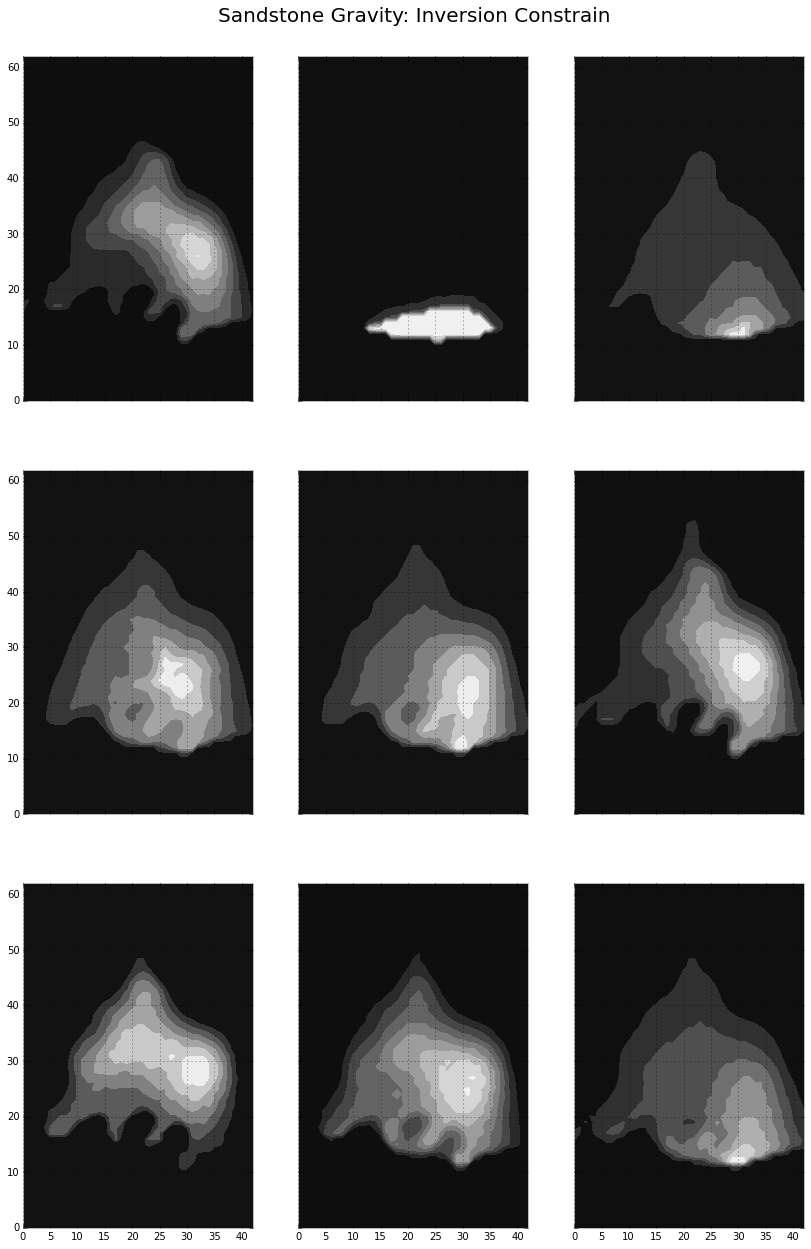

In [7]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize = (14, 21))


plt.text(0.5, 1.1, "Sandstone Gravity: Inversion Constrain",
     horizontalalignment='center',
        fontsize=20,
        transform = axs[0,1].transAxes)
#plt.subplots_adjust(top=2.15)
#axs[0,1].set_title("Posterior Faults: Non-Constrains", fontsize=20)

for i, g  in enumerate(L.trace('model', chain = 0)[-n_samples:]):
#    densities = {0: 0.1,
 #              1: 2610,
  #             2: 2920,
   #            3: 3100,
    #           4: 2920,
     #          5: 2610}
    #g.analyse_geophysics(densities)
    cf = axs[i- 3*(i/3),i/3].contourf(g.geophys.grv_data, cmap = 'gray' , alpha = 1, figsize= (63,43))
    
    
plt.savefig("Sandstone_Figures/9plot_cmplx3_grav.png", transparent = False)      

In [41]:
M.trace("e_sq", chain = None)[:]

array([ 233640.1390134 ,  233640.1390134 ,  233640.1390134 ,
        233640.1390134 ,  233691.29904105,  233691.29904105,
        233691.29904105,  233691.29904105,  233509.59232516,
        233509.59232516,  233509.59232516,  233484.78130122,
        233484.78130122,  233484.78130122,  233484.78130122])

(59.526460999999998, 59.494371999999998)

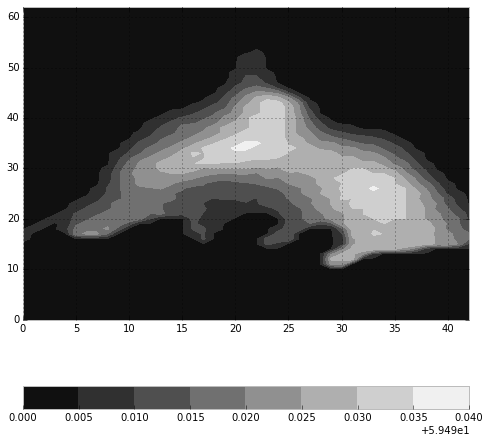

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
# imshow(geophys.grv_data, cmap = 'jet')
# define contour levels
levels = np.arange(322,344,1)
n = 0
cf = ax.contourf(GeoMod_samples[n].geophys.grv_data, cmap = 'gray')#, vmin = 324, vmax = 342)
cbar = plt.colorbar(cf, orientation = 'horizontal')
# print levels
np.max(GeoMod_samples[n].geophys.grv_data), np.min(GeoMod_samples[n].geophys.grv_data)

### Entrophy representation

In [ ]:
import copy

In [ ]:
%matplotlib inline

In [ ]:
pid = 1

#p5 = np.zeros_like(section_samples[0].grid)
p5 = copy.deepcopy(section_samples[0])
p5.grid = np.zeros_like(section_samples[0].grid)
                       
for i in range(9):
    p5.grid += section_samples[i].grid == pid 


In [ ]:
# p5.grid = p5.grid / 9.
print (type(p5.grid))
a = np.array_like(p5.grid)
print a, type(a)
p5.grid.dtype = np.float64

p5.grid = p5.grid / 2.

p5.plot_section('x',cell_pos=40,colorbar = True, alpha = 0.8, cmap = 'coolwarm_r',
                   figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = False, 
                   savefig = True, fig_filename = "Uncertainty Sandstone")
    

In [ ]:
H = -sum pi log pi

In [ ]:
plot(M);


# Appendix

## Setting likelihood function of our square error


#### Filtered

Here you can decide how much value you give to your Inversion

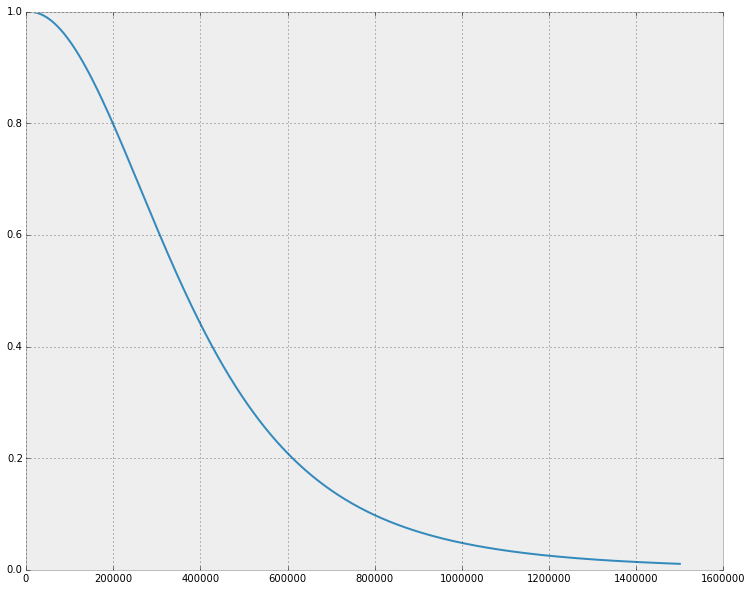

In [34]:
e_sq = np.linspace(0,1500000,1000)

a = [10**(pm.half_cauchy_like(i/10000,0.8,60)-pm.half_cauchy_like(0.8,0.8,60)) for i in e_sq]

plt.plot(e_sq, a)


## Visualization of the parameters that change in every iteration

### Info values in original xml

In [ ]:
reload(gxml)
gmod_obj = gxml.GeomodellerClass()
gmod_obj.load_geomodeller_file(sandstone)

gmod_obj.change_formation_values_PyMC(info = True)

### Info values in changed xml

In [ ]:
reload(gxml)
gmod_obj = gxml.GeomodellerClass()
gmod_obj.load_geomodeller_file( 'Temp_Sandstone/new.xml')
gmod_obj.change_formation_values_PyMC(info = True)

In [ ]:
# Section names:
section_names = gmod_obj.get_section_names()
print "section names",section_names, "\n" 

# Choose the section we want to use with Positon
sections = gmod_obj.get_sections()
print "Chosen section by position", sections, "\n"

# Create a dictionary so we can acces the section through the name
section_dict = gmod_obj.create_sections_dict()
print "Chosen section by entry", section_dict["Seismic"][1], "\n"



# Formation names
formation_names = gmod_obj.get_formation_names()
print "formation names", formation_names, "\n"

# Get the points of all formation for a given section: Position
#contact_points = gmod_obj.get_formation_point_data(sections) #to extract points you have to choose one of the sections
#print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

## Get the points of all formation for a given section: Dictionary
contact_points = gmod_obj.get_formation_point_data(section_dict['Atley']) #to extract points you have to choose one of the sections
print "Contact points on the chosen section", contact_points, "\n", type(contact_points), np.shape(contact_points)

# Showing contact points
points = gmod_obj.get_point_coordinates(contact_points)
print "Points coordinates\n", points, np.shape(points), "\n"

# Foliations

foliations = gmod_obj.get_foliations(section_dict['Atley'])
print "foliations" , foliations,  "\n\n\n"
for i in range(len(foliations)): print "azimut:",gmod_obj.get_foliation_azimuth(foliations[i]), "dip",gmod_obj.get_foliation_dip(foliations[i]), "coordinates", gmod_obj.get_foliation_coordinates(foliations[i])  


In [ ]:
`piy  zx cvm

In [ ]:

ZXDEW1ÇohyrwsQWET UO`<   -1